# Application: Overfitting and Underfitting

```{contents}
```

> From **machinelearningmastery**

During the training of a machine learning model, the current state of the model at each step of the training algorithm can be evaluated. It can be evaluated on the training dataset to give an idea of how well the model is “learning.” It can also be evaluated on a hold-out validation dataset that is not part of the training dataset. Evaluation on the validation dataset gives an idea of how well the model is “generalizing.”

- **Train Learning Curve:** Learning curve calculated from the training dataset that gives an idea of how well the model is learning.

- **Validation Learning Curve:** Learning curve calculated from a hold-out validation dataset that gives an idea of how well the model is generalizing.
It is common to create dual learning curves for a machine learning model during training on both the training and validation datasets.

In some cases, it is also common to create learning curves for multiple metrics, such as in the case of classification predictive modeling problems, where the model may be optimized according to cross-entropy loss and model performance is evaluated using classification accuracy. In this case, two plots are created, one for the learning curves of each metric, and each plot can show two learning curves, one for each of the train and validation datasets.

- **Optimization Learning Curves:** Learning curves calculated on the metric by which the parameters of the model are being optimized, e.g. loss.

- **Performance Learning Curves:** Learning curves calculated on the metric by which the model will be evaluated and selected, e.g. accuracy.

Now that we are familiar with the use of learning curves in machine learning, let’s look at some common shapes observed in learning curve plots.

---

> **Always associate high bias with underfitting, and high variance with overfitting.**


## Diagnosing Model Behavior

The shape and dynamics of a learning curve can be used to diagnose the behavior of a machine learning model and in turn perhaps suggest at the type of configuration changes that may be made to improve learning and/or performance.

There are three common dynamics that you are likely to observe in learning curves; they are:

- Underfit.
- Overfit.
- Good Fit.

We will take a closer look at each with examples. The examples will assume that we are looking at a minimizing metric, meaning that smaller relative scores on the y-axis indicate more or better learning.

## Underfitting Learning Curves

Underfitting refers to a model that cannot learn the training dataset.

> An underfit model can be identified from the learning curve of the training loss only.

> It may show a flat line or noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all.

> An example of this is provided below and is common when the model does not have a suitable capacity for the complexity of the dataset.

Below are two examples, on the left, we have a very flat looking curve after many epochs on both train and validation, this shows that the model is not learning very well.

Right side, we have a curve that is still decreasing at the end of epoch finish, it may indicate our model has not **converged to the minimum**.

---

One thing is that underfitting means high bias, and adding data usually won't be sufficient any more. Imagine a linear regression model fitted on a polynomial target function of degree 9, no matter how much data we give it, it is highly unlikely that our degree 2 model will learn on this much more complex dataset.

```{list-table} Underfitting
:header-rows: 1
:name: underfitting-learning-curve

* - Example of Training Learning Curve Showing An Underfit Model That Does Not Have Sufficient Capacity
  - Example of Training Learning Curve Showing an Underfit Model That Requires Further Training
* - ![underfitting-1](https://drive.google.com/uc?id=116s-9T2gCfBmzNzVKo66FziSn2Axa1Pe)
  - ![underfitting-2](https://drive.google.com/uc?id=119eWMD3HoaCzOpg3OZjXq1iqVEzO3_3r)
```

**Diagnosis:**

1.  First, our training learning curve may show a flat line or noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all. 

---

**Solution:**

1. Add more observations. You may not have enough data for the existing patterns to become strong signals. However, bias usually do not reduce with increased data.

2. Add more features. Occasionally our model is under-fitting on the grounds that the feature items are insufficient.

3. Reduce any regularization on the model. If you have explicit regularization parameters specified (i.e. dropout, weight regularization), remove or reduce these parameters. 

4. Increase model capacity. Your model capacity may not be large enough to capture and learn existing signals. 

---

**Diagnosis:**

2. An underfit model may also be identified by a training and validation loss that are continuing to decrease at the end of the plot. This indicates that the model is capable of further learning and that the training process was halted prematurely.

---


**Solution:**

1. Increase the number of epochs until the validation curve has stopped improving. This is a good time to crank up the epochs and add an early stopping callback to identify how many epochs are required. 

2. If it is taking a long time to reach a minimum for the validation curve, increase the learning rate to speed up the gradient traversal and also add a callback to automatically adjust the learning rate.



## Overfit Learning Curves

> Overfitting refers to a model that has learned the training dataset too well, including the statistical noise or random fluctuations in the training dataset.

> The problem with overfitting, is that the more specialized the model becomes to training data, the less well it is able to generalize to new data, resulting in an increase in generalization error. This increase in generalization error can be measured by the performance of the model on the validation dataset.

This often occurs if the model has more capacity than is required for the problem, and, in turn, too much flexibility. It can also occur if the model is trained for too long.

A plot of learning curves shows overfitting if:

- The plot of training loss continues to decrease with experience.

- The plot of validation loss decreases to a point and begins increasing again.

The inflection point in validation loss may be the point at which training could be halted as experience after that point shows the dynamics of overfitting.

The example plot below demonstrates a case of overfitting

```{list-table} Overfitting
:header-rows: 1
:name: overfitting-learning-curve

* - Possible Scenario of Overfitting 
* - ![overfitting-1](https://drive.google.com/uc?id=11BtK2cd1JvYRBkpTCAUzcELeO2OqGpTS)
```

> **However, a model that overfits is not necessarily a bad thing. In fact, it signals that the model has extracted all the signal that that particular model could learn. The issues to be concerned about with overfitting is the magnitude and the inflection point.**

> **A model that overfits early and has a sharp “U” shape often indicates overcapacity and/or a learning rate that is too high.**

**Diagnosis:**

1. The training loss continues to decrease with epochs while
the validation loss has decreased to a minimum and has begun to increase. This is a strong signal that the model has started to fit too well to your training data (hence the continuous decrease in training loss), but it starts to not capture signals from out-of-sample data (which indicates an increase in validation loss).

---

**Solution:**

1. Regularize how quickly the model learns by reducing the learning rate. Add a callback to automatically reduce the learning rate as the validation loss plateaus

2. Regularize model capacity by reducing the number and/or size of the hidden layers

3. Regularize the weights to constrain the complexity of the network.

4. Regularize happenstance patterns by adding dropout to minimize the chance of fitting patterns to noise in the data.

5. And of course, in the context of deep learning, how can we forget good old augmentation.

6. Add an early stopping callback to stop training once the validation curve has stopped improving.



## Good Fit Learning Curves

A good fit is the goal of the learning algorithm and exists between an overfit and underfit model.

A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.

The loss of the model will almost always be lower on the training dataset than the validation dataset. This means that we should expect some gap between the train and validation loss learning curves. This gap is referred to as the “generalization gap.”

A plot of learning curves shows a good fit if:

- The plot of training loss decreases to a point of stability.

- The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

Continued training of a good fit will likely lead to an overfit.

The example plot below demonstrates a case of a good fit.

```{list-table} Good Fit
:header-rows: 1
:name: goodfit-learning-curve

* - Good Fit
* - ![goodfit-1](https://drive.google.com/uc?id=11EJeBujI2zE8j-C_Rz2diMMN9JFbJZHQ)
```

## Diagnosing Unrepresentative Datasets

Learning curves can also be used to diagnose properties of a dataset and whether it is relatively representative. An unrepresentative dataset means a dataset that may not capture the statistical characteristics relative to another dataset drawn from the same domain, such as between a train and a validation dataset. This can commonly occur if the number of samples in a dataset is too small or if certain characteristics are not adequately represented, relative to another dataset.

There are two common cases that could be observed; they are:

- Training dataset is relatively unrepresentative
- Validation dataset is relatively unrepresentative

### Unrepresentative train dataset

An unrepresentative training dataset means that the training dataset does not provide sufficient information to learn the problem, relative to the validation dataset used to evaluate it. This situation can be identified by a learning curve for training loss that shows improvement and similarly a learning curve for validation loss that shows improvement, but a large gap remains between both curves. This can occur when

**Diagnosis:**

- The training dataset has too few examples as compared to the validation dataset.

- Training dataset contains features with less variance than the validation dataset.

---

**Solution:**

1. Add more observations. You may not have enough data to capture patterns present in both the training and validation data.

2. If using CNNs incorporate data augmentation to increase feature variability in the training data. 

3. Make sure that you are randomly sampling observations to use in your training and validation sets. If your data is ordered by some feature (i.e. neighborhood, class) then you validation data may have features not represented in your training data. 

4. Perform cross-validation so that all your data has the opportunity to be represented in both the training and validation sets. 



```{list-table} Unrepresentative Train and Validation Sets
:header-rows: 1
:name: unrepresentative-learning-curve

* - Unrepresentative Train Set
  - Unrepresentative Validation Set
  - Unrepresentative Validation Set Info Leak
* - ![unrepresentative-train](https://drive.google.com/uc?id=11FtUBffhFS0QTGrVzD7wBgPffz921ZSj)
  - ![unrepresentative-validation](https://drive.google.com/uc?id=11JS7UCfC0MjLZQv3LxBSmaf-CyH1T6Io)
  - ![unrepresentative-validation-infoleak](https://drive.google.com/uc?id=11LHPDT5xwYsMuIFU5H99t4VjgVrz6QXK)
```

### Unrepresentative validation dataset

An unrepresentative validation dataset means that the validation dataset does not provide sufficient information to evaluate the ability of the model to generalize. This may occur if the validation dataset has too few examples as compared to the training dataset. This case can be identified by a learning curve for training loss that looks like a good fit (or other fits) and a learning curve for validation loss that shows noisy movements and little or no improvement.

---

**Solution:**

1. Add more observations to your validation dataset.

2. If you are limited on the number of observations, perform cross-validation so that all your data has the opportunity to be represented in both the training and validation sets. 


It may also be identified by a validation loss that is lower than the training loss, no matter how many training iterations you perform. In this case, it indicates that the validation dataset may be easier for the model to predict than the training dataset. This can happen for various reason but is commonly associated with:

- Information leakage where a feature in the training data has direct ties to observations and responses in the validation data (i.e. patient ID).

- Poor sampling procedures where duplicate observations exist in the training and validation datasets.
V
0 alidation dataset contains features with less variance than the training dataset.

---

**Solution:**

1. Check to make sure duplicate observations do not exists across training and validation datasets.

2. Check to make sure there is no information leakage across training and validation datasets.

3. Make sure that you are randomly sampling observations to use in your training and validation sets so that feature variance is consistent across both sets.

4. Perform cross-validation so that all your data has the opportunity to be represented in both the training and validation sets.

## Scikit-Learn Example on Underfitting and Overfitting

See [reference](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py).

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.

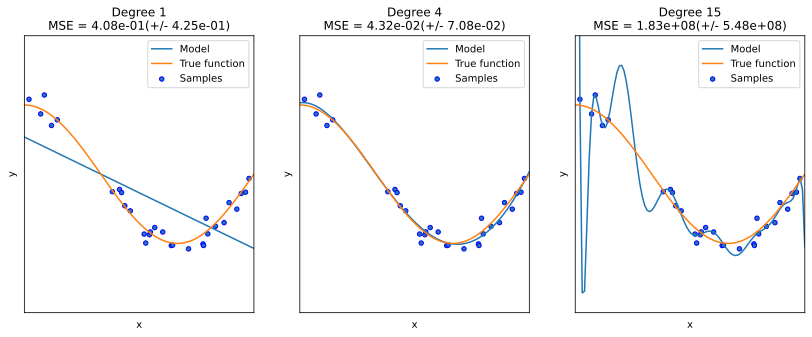

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from matplotlib_inline import backend_inline

backend_inline.set_matplotlib_formats("svg")


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()


## References and Further Readings

- [scikit-learn's learning curve](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curve)
- [learning-curve-diagnostics](https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/learning-curve-diagnostics.nb.html)
- [machine learning master](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)